In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
items = pd.read_csv("20191226-items.csv")
reviews = pd.read_csv("20191226-reviews.csv")

In [3]:
reviews = pd.merge(reviews, items, how="left", left_on="asin", right_on="asin")

In [4]:
reviews.isnull().sum()

asin                 0
name                 2
rating_x             0
date                 0
verified             0
title_x             14
body                21
helpfulVotes     40771
brand              200
title_y              0
url                  0
image                0
rating_y             0
reviewUrl            0
totalReviews         0
price                0
originalPrice        0
dtype: int64

In [5]:
reviews

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,url,image,rating_y,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",https://www.amazon.com/Apple-iPhone-64GB-Gray-...,https://m.media-amazon.com/images/I/71yMgOenT5...,5.0,https://www.amazon.com/product-reviews/B081TJFVCJ,1,478.97,0.00


In [6]:
reviews['char_count'] = reviews['body'].str.len() ## this also includes spaces

In [7]:
reviews

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,url,image,rating_y,reviewUrl,totalReviews,price,originalPrice,char_count
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00,1688.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00,748.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00,768.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00,524.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.00,606.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00,636.0
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00,523.0
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00,26.0
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",https://www.amazon.com/Apple-iPhone-64GB-Gray-...,https://m.media-amazon.com/images/I/71yMgOenT5...,5.0,https://www.amazon.com/product-reviews/B081TJFVCJ,1,478.97,0.00,54.0


In [8]:
# 0.5 Rename columns
reviews.rename(columns={"rating_x": "rating","date":"Review_date", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating","body":"Review"}, inplace=True)
#reviews["id"] = reviews.index + 1
reviews.head(15)

,asin,name,rating,Review_date,verified,title,Review,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice,char_count
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0,1688.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0,748.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0,768.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0,524.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0,606.0
5,B0000SX2UC,J. White,4,"September 25, 2005",False,Worked great for me,"Hello, I have this phone and used it until I d...",NaN,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0,388.0
6,B0000SX2UC,the cell phone store owner,5,"April 16, 2004",False,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0,911.0
7,B0000SX2UC,Matt,4,"April 3, 2004",False,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that...",2.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0,356.0
8,B0000SX2UC,Charles Cook,5,"November 24, 2003",False,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this...",7.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0,270.0
9,B0000SX2UC,Amazon Customer,3,"February 2, 2004",False,Pissed off-a little bit,ok well im in school and i need the text messa...,3.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0,421.0


In [9]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces

In [10]:
reviews# Remove null values and unneeded features
reviews = reviews.dropna()
reviews = reviews.drop(['Review',], 1)
reviews = reviews.reset_index(drop=True)

In [11]:
reviews.isnull().sum()
reviews

,asin,name,rating,Review_date,verified,title,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice,char_count
0,B001AO4OUC,Elizabeth,4,"May 12, 2009",True,tough little phone,1.0,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0,0.0,1100.0
1,B001AO4OUC,"Ron Malinowski, Jr.",1,"November 19, 2012",True,Boost Mobile no Longer allows IDEN service,2.0,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0,0.0,195.0
2,B001AO4OUC,PENNY,4,"November 25, 2012",True,SIM CARD,1.0,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0,0.0,243.0
3,B001AO4OUC,Anthony L. Savarese,1,"October 18, 2009",True,Cell,1.0,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0,0.0,215.0
4,B001AO4OUC,Yoda,4,"April 7, 2010",False,For a basic phone quite good,2.0,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0,0.0,1241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27066,B081H6STQQ,Rock Edge,5,"July 16, 2019",False,Candy bar phone is back!,12.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.0,0.0,5357.0
27067,B081H6STQQ,Cindy Cowles,3,"July 17, 2019",False,Updated review,2.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.0,0.0,2178.0
27068,B081H6STQQ,Los Kositos,5,"October 7, 2019",False,From iPhone to Android and loving it,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.0,0.0,1959.0
27069,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.0,0.0,636.0


In [12]:
reviews['rating'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [13]:
reviews.dropna(inplace=True)
reviews[reviews['rating'] != 3]
reviews['Positivity'] = np.where(reviews['rating'] > 3, 1, 0)
cols = ['asin', 'name', 'rating', 'Review_date','verified', 'title', 'helpfulVotes','item_title','url','image','overall_rating','reviewUrl','totalReviews','price','originalPrice']
reviews.drop(cols, axis=1, inplace=True)
reviews.head()

,brand,char_count,Positivity
0,Motorola,1100.0,1
1,Motorola,195.0,0
2,Motorola,243.0,1
3,Motorola,215.0,0
4,Motorola,1241.0,1


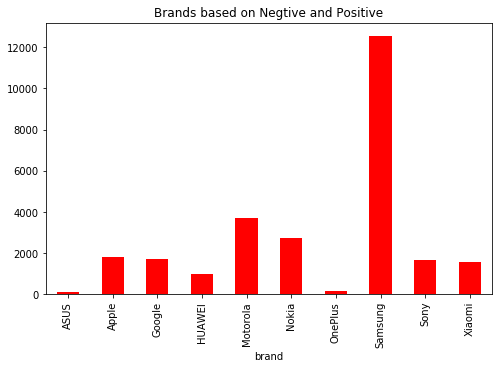

In [14]:
# Brand distribution
ax = reviews.groupby("brand").count()["Positivity"].plot(kind="bar", 
                                                 figsize=(8, 5),
                                                 title="Brands based on Negtive and Positive",color='r')
plt.show()

In [15]:
# 0.6 Convert string into datetime
from datetime import datetime
reviews["Review_date"] = reviews["Review_date"].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
reviews["Review_date"].head()

KeyError: 'Review_date'

In [ ]:
reviews["id"] = reviews.index + 1

In [ ]:
reviews['year'] = pd.DatetimeIndex(reviews['Review_date']).year
reviews['month'] = pd.DatetimeIndex(reviews['Review_date']).month
reviews['day'] = pd.DatetimeIndex(reviews['Review_date']).day
reviews['Week_Number'] = reviews['Review_date'].dt.week

In [ ]:
reviews.to_csv (r'Reviews_File.csv', index = False, header=True)
reviews